Activity 9

In [153]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re
import json
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [155]:
# Define the URL
url = "https://www.gutenberg.org/browse/scores/top"
# Read the HTML from the URL
response = requests.get(url)

In [156]:
def status_check(r):
    if r.status_code==200:
        print("Success!")
        return 1
    else:
        print("Failed!")
        return -1

In [157]:
status_check(response)

Success!


1

In [158]:
contents = response.content.decode(response.encoding)

In [159]:
soup = BeautifulSoup(contents, 'html.parser')

In [160]:
# Empty list to hold all the http links in the HTML page
lst_links=[]

In [161]:
# Find all the href tags and store them in the list of links
for link in soup.find_all('a'):
    #print(link.get('href'))
    lst_links.append(link.get('href'))

In [162]:
lst_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

In [163]:
booknum=[]

In [164]:
for i in range(19,119):
    link=lst_links[i]
    link=link.strip()
    # Regular expression to find the numeric digits in the link (href) string
    n=re.findall('[0-9]+',link)
    if len(n)==1:
        # Append the filenumber casted as integer
        booknum.append(int(n[0]))

In [165]:
print ("\nThe file numbers for the top 100 ebooks on Gutenberg are shown below\n"+"-"*70)
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 84, 33283, 1513, 1342, 25344, 46, 345, 11, 64317, 174, 5200, 2542, 43, 76, 844, 72011, 1080, 72013, 1952, 98, 1232, 1661, 2701, 1400, 1260, 2554, 46633, 6130, 2591, 219, 72009, 74, 55, 28054, 408, 1399, 23, 1184, 2814, 45, 27827, 3207, 41, 205, 16, 768, 72007, 2600, 600, 15399, 72010, 16328, 996, 4300, 72014, 1727, 932, 42324, 5740, 2000, 120, 244, 2148, 41445, 8800, 36, 730, 100, 67098, 30254, 2680, 4363, 72006, 12116, 20203, 140, 72015, 58585, 10007, 158, 8492, 72008, 2852, 514, 7370, 6133]


In [166]:
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright How-To
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2023-11-03204383
last 7 days1467432
last 30 days6492458



Top 100 EBooks yesterday
T

In [167]:
# Temp empty list of Ebook names
lst_titles_temp=[]

In [168]:
start_idx=soup.text.splitlines().index('Top 100 EBooks yesterday')

In [169]:
for i in range(100):
    lst_titles_temp.append(soup.text.splitlines()[start_idx+2+i])

In [170]:
lst_titles=[]
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*',lst_titles_temp[i]).span()
    lst_titles.append(lst_titles_temp[i][id1:id2])

In [171]:
for l in lst_titles:
    print(l)

Top 
Top 
Top 
Top 


Top 

Frankenstein
Calculus Made Easy by Silvanus P
Romeo and Juliet by William Shakespeare 
Pride and Prejudice by Jane Austen 
The Scarlet Letter by Nathaniel Hawthorne 
A Christmas Carol in Prose
Dracula by Bram Stoker 
Alice
The Great Gatsby by F
The Picture of Dorian Gray by Oscar Wilde 
Metamorphosis by Franz Kafka 
A Doll
The Strange Case of Dr
Adventures of Huckleberry Finn by Mark Twain 
The Importance of Being Earnest
Nobody
A Modest Proposal by Jonathan Swift 
Lefty o
The Yellow Wallpaper by Charlotte Perkins Gilman 
A Tale of Two Cities by Charles Dickens 
The Prince by Niccol
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Moby Dick
Great Expectations by Charles Dickens 
Jane Eyre
Crime and Punishment by Fyodor Dostoyevsky 
The 
The Iliad by Homer 
Grimms
Heart of Darkness by Joseph Conrad 
Scaffolding 
The Adventures of Tom Sawyer
The Wonderful Wizard of Oz by L
The Brothers Karamazov by Fyodor Dostoyevsky 
The Souls of Black Folk by W
Anna 

Activity 10

In [172]:
# Load the API key from JSON
with open("C:/Users/mattl/OneDrive/Documents/GitHub/DSC540/APIkeys.json") as f:
    keys = json.load(f)
    omdb_key = keys["omdb"]

In [173]:
# OMDb portal
serviceurl = 'http://www.omdbapi.com/?'


In [174]:
# Utility function to print the movie data from JSON
def print_json(movie_data):
    print(json.dumps(movie_data, indent=4))


In [175]:
# Utility function to download and save the movie poster
def download_movie_poster(movie_data, location):
    poster_url = movie_data.get('Poster')
    if poster_url != 'N/A':
        poster = urllib.request.urlopen(poster_url).read()
        with open(location, 'wb') as f:
            f.write(poster)
        print("Poster downloaded and saved.")


In [176]:
# Utility function to search for a movie by its name
def search_movie(movie_name):
    url = serviceurl + urllib.parse.urlencode({'t': movie_name}) + f'&apikey={omdb_key}'
    try:
        connection = urllib.request.urlopen(url)
        data = connection.read().decode()
        json_data = json.loads(data)
        print_json(json_data)
        if json_data['Response'] == 'True':
            download_movie_poster(json_data, f'{movie_name}_poster.jpg')
    except Exception as e:
        print(f"Error: {e}")

In [177]:
# Test with 'Titanic'
search_movie('Titanic')

# Test with 'Random_error' to check error handling
search_movie('Random_error')

{
    "Title": "Titanic",
    "Year": "1997",
    "Rated": "PG-13",
    "Released": "19 Dec 1997",
    "Runtime": "194 min",
    "Genre": "Drama, Romance",
    "Director": "James Cameron",
    "Writer": "James Cameron",
    "Actors": "Leonardo DiCaprio, Kate Winslet, Billy Zane",
    "Plot": "A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.",
    "Language": "English, Swedish, Italian, French",
    "Country": "United States, Mexico",
    "Awards": "Won 11 Oscars. 126 wins & 83 nominations total",
    "Poster": "https://m.media-amazon.com/images/M/MV5BMDdmZGU3NDQtY2E5My00ZTliLWIzOTUtMTY4ZGI1YjdiNjk3XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_SX300.jpg",
    "Ratings": [
        {
            "Source": "Internet Movie Database",
            "Value": "7.9/10"
        },
        {
            "Source": "Rotten Tomatoes",
            "Value": "88%"
        },
        {
            "Source": "Metacritic",
            "Value": "75/

Other Tasks

In [184]:
#Creating the Data Frame
df=pd.read_csv("C:/Users/mattl/OneDrive/Documents/GitHub/DSC550/HR_comma_sep.csv")

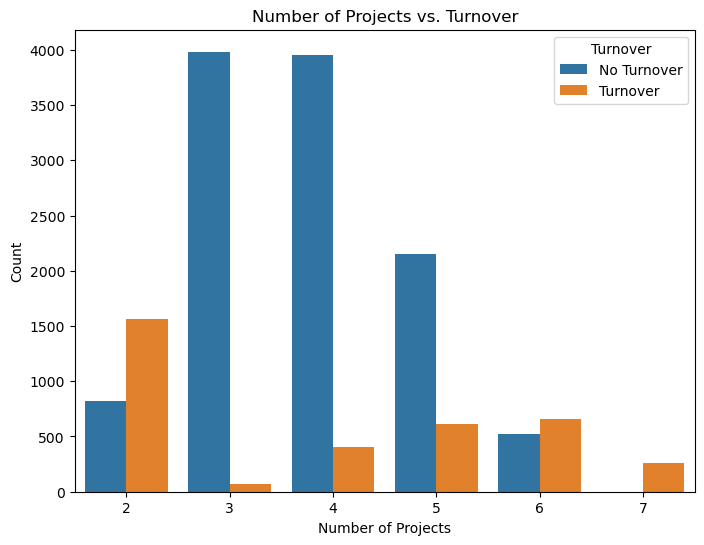

In [185]:
# Bar Chart Number of Projects vs. Turnover
plt.figure(figsize=(8, 6))
sns.countplot(x='number_project', hue='left', data=df)
plt.title('Number of Projects vs. Turnover')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.legend(title='Turnover', labels=['No Turnover', 'Turnover'])
plt.show()

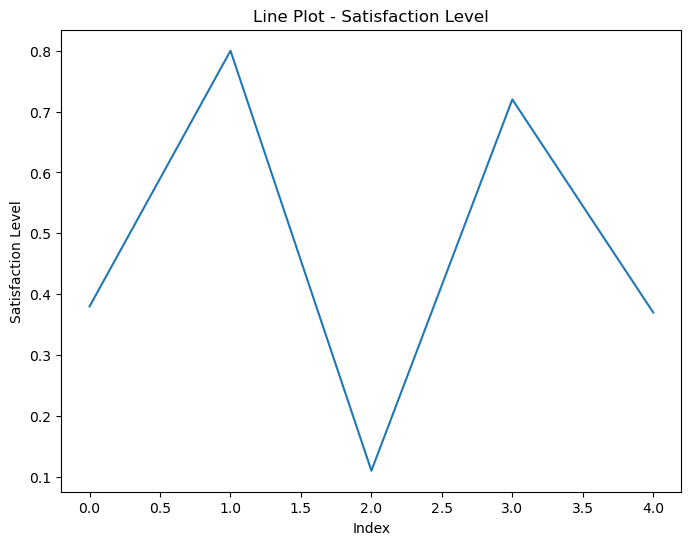

In [186]:
# Line Plot for Satisfaction Level
plt.figure(figsize=(8, 6))
plt.plot(df['satisfaction_level'].head())
plt.title('Line Plot - Satisfaction Level')
plt.xlabel('Index')
plt.ylabel('Satisfaction Level')
plt.show()

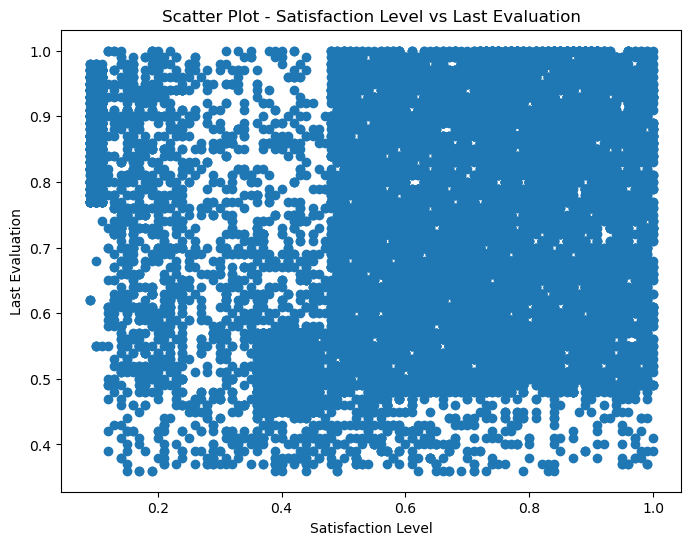

In [187]:
# Scatter Plot (using 'satisfaction_level' and 'last_evaluation')
plt.figure(figsize=(8, 6))
plt.scatter(df['satisfaction_level'], df['last_evaluation'])
plt.title('Scatter Plot - Satisfaction Level vs Last Evaluation')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.show()